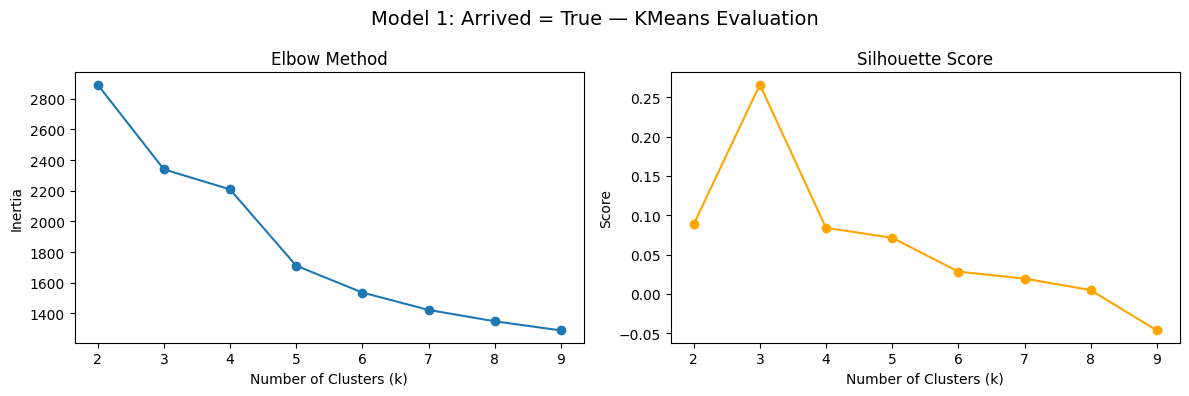

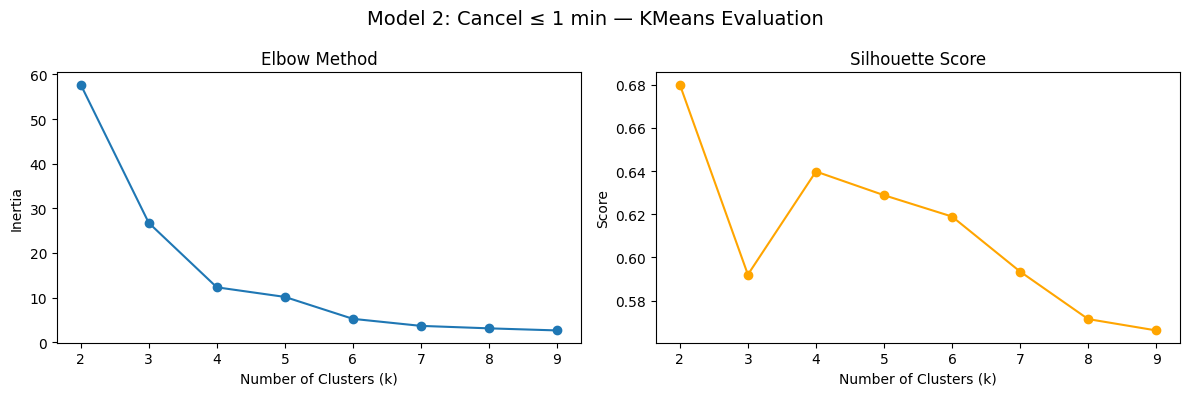

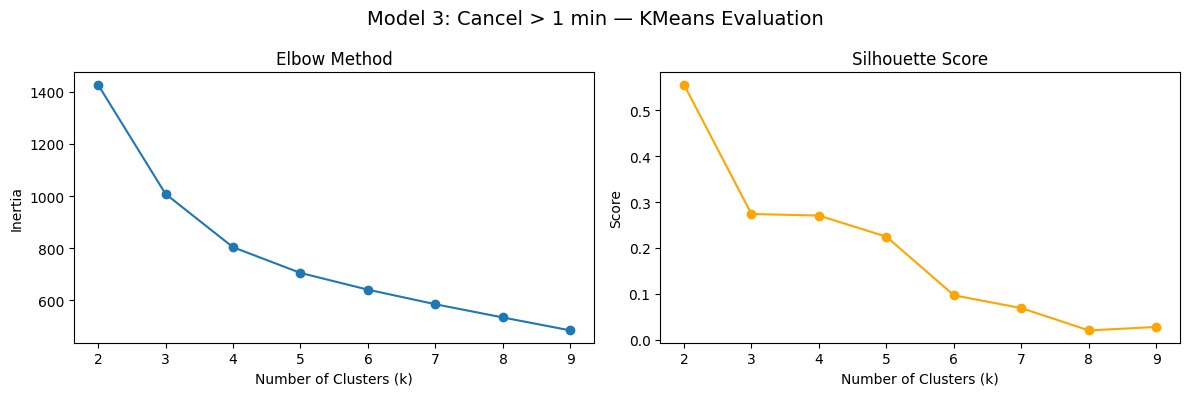

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/rider_cancellations.csv')

def evaluate_kmeans_scaled(X, k_range=range(2, 10), title_prefix=""):
    inertias = []
    silhouette_scores = []

    for k in k_range:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('kmeans', KMeans(n_clusters=k, random_state=42))
        ])
        labels = pipeline.fit_predict(X)
        kmeans = pipeline.named_steps['kmeans']
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'{title_prefix} — KMeans Evaluation', fontsize=14)

    axes[0].plot(k_range, inertias, marker='o')
    axes[0].set_title("Elbow Method")
    axes[0].set_xlabel("Number of Clusters (k)")
    axes[0].set_ylabel("Inertia")

    axes[1].plot(k_range, silhouette_scores, marker='o', color='orange')
    axes[1].set_title("Silhouette Score")
    axes[1].set_xlabel("Number of Clusters (k)")
    axes[1].set_ylabel("Score")

    plt.tight_layout()
    plt.show()

# -------------------------
# Model 1: Arrived == True
# -------------------------
df_m1 = df[df['arrived'] == True].copy()
X1 = df_m1[['rider_rating', 'wait_time', 'rider_cancelation_rate', 'distance_from_pin']]
evaluate_kmeans_scaled(X1, title_prefix="Model 1: Arrived = True")

# -------------------------
# Model 2: Arrived == False and cancelation_time <= 1
# -------------------------
df_m2 = df[(df['arrived'] == False) & (df['cancelation_time'] <= 1)].copy()
X2 = df_m2[['rider_cancelation_rate']]
evaluate_kmeans_scaled(X2, title_prefix="Model 2: Cancel ≤ 1 min")

# -------------------------
# Model 3: Arrived == False and cancelation_time > 1
# -------------------------
df_m3 = df[(df['arrived'] == False) & (df['cancelation_time'] > 1)].copy()
X3 = df_m3[['rider_rating', 'cancelation_time', 'rider_cancelation_rate']]
evaluate_kmeans_scaled(X3, title_prefix="Model 3: Cancel > 1 min")

In [51]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/rider_cancellations.csv')

# -------------------------
# Model 1: Arrived == True
# -------------------------
df_m1 = df[df['arrived'] == True].copy()
X1 = df_m1[['rider_rating', 'wait_time', 'rider_cancelation_rate', 'distance_from_pin']]

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1_scaled)

print("\nModel 1: PCA Components (PC1 & PC2):")
for i, pc in enumerate(pca1.components_[:2]):
    print(f"\nPC{i+1}:")
    for feature, coef in zip(X1.columns, pc):
        print(f"  {feature:25s}: {coef:.4f}")

# -------------------------
# Model 3: Arrived == False and cancelation_time > 1
# -------------------------
df_m3 = df[(df['arrived'] == False) & (df['cancelation_time'] > 1)].copy()
X3 = df_m3[['rider_rating', 'cancelation_time', 'rider_cancelation_rate']]

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

pca3 = PCA(n_components=2)
X3_pca = pca3.fit_transform(X3_scaled)

print("\nModel 3: PCA Components (PC1 & PC2):")
for i, pc in enumerate(pca3.components_[:2]):
    print(f"\nPC{i+1}:")
    for feature, coef in zip(X3.columns, pc):
        print(f"  {feature:25s}: {coef:.4f}")



Model 1: PCA Components (PC1 & PC2):

PC1:
  rider_rating             : -0.7057
  wait_time                : -0.0298
  rider_cancelation_rate   : 0.7057
  distance_from_pin        : 0.0556

PC2:
  rider_rating             : -0.0324
  wait_time                : 0.7279
  rider_cancelation_rate   : 0.0521
  distance_from_pin        : -0.6829

Model 3: PCA Components (PC1 & PC2):

PC1:
  rider_rating             : 0.7071
  cancelation_time         : -0.0292
  rider_cancelation_rate   : -0.7065

PC2:
  rider_rating             : -0.0009
  cancelation_time         : 0.9991
  rider_cancelation_rate   : -0.0422


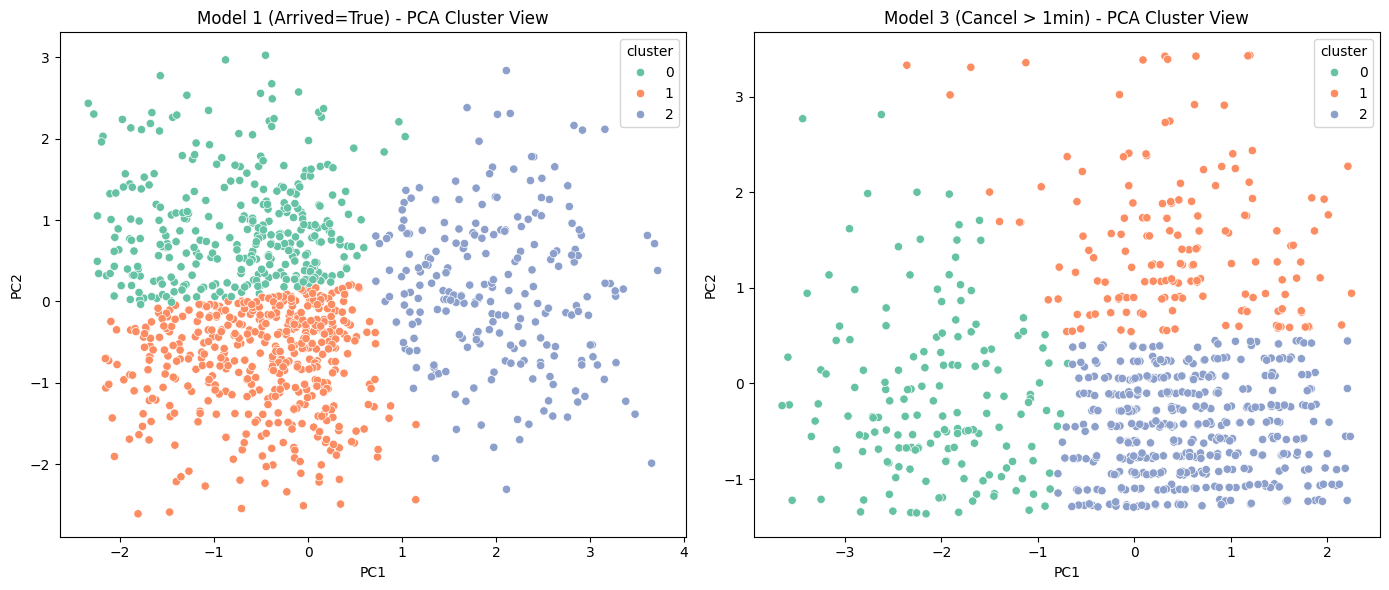

In [52]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/rider_cancellations.csv')

# -------------------------
# Model 1: Arrived == True
# -------------------------
df_m1 = df[df['arrived'] == True].copy()
X1 = df_m1[['rider_rating', 'wait_time', 'rider_cancelation_rate', 'distance_from_pin']]

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1_scaled)

kmeans1 = KMeans(n_clusters=3, random_state=42)
labels1 = kmeans1.fit_predict(X1_pca)

df_m1['PC1'] = X1_pca[:, 0]
df_m1['PC2'] = X1_pca[:, 1]
df_m1['cluster'] = labels1

# -------------------------
# Model 3: Arrived == False and cancelation_time > 1
# -------------------------
df_m3 = df[(df['arrived'] == False) & (df['cancelation_time'] > 1)].copy()
X3 = df_m3[['rider_rating', 'cancelation_time', 'rider_cancelation_rate']]

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

pca3 = PCA(n_components=2)
X3_pca = pca3.fit_transform(X3_scaled)

kmeans3 = KMeans(n_clusters=3, random_state=42)
labels3 = kmeans3.fit_predict(X3_pca)

df_m3['PC1'] = X3_pca[:, 0]
df_m3['PC2'] = X3_pca[:, 1]
df_m3['cluster'] = labels3

# -------------------------
# Plot Clusters in PCA Space
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_m1, x='PC1', y='PC2', hue='cluster', palette='Set2', ax=axes[0])
axes[0].set_title("Model 1 (Arrived=True) - PCA Cluster View")

sns.scatterplot(data=df_m3, x='PC1', y='PC2', hue='cluster', palette='Set2', ax=axes[1])
axes[1].set_title("Model 3 (Cancel > 1min) - PCA Cluster View")

plt.tight_layout()
plt.show()


/var/folders/mp/nyl0jgj14nx44klzhdqh9d180000gn/T/ipykernel_3370/996305659.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_m2, x='decision', y='rider_cancelation_rate', palette='Set2', ax=axes[1])


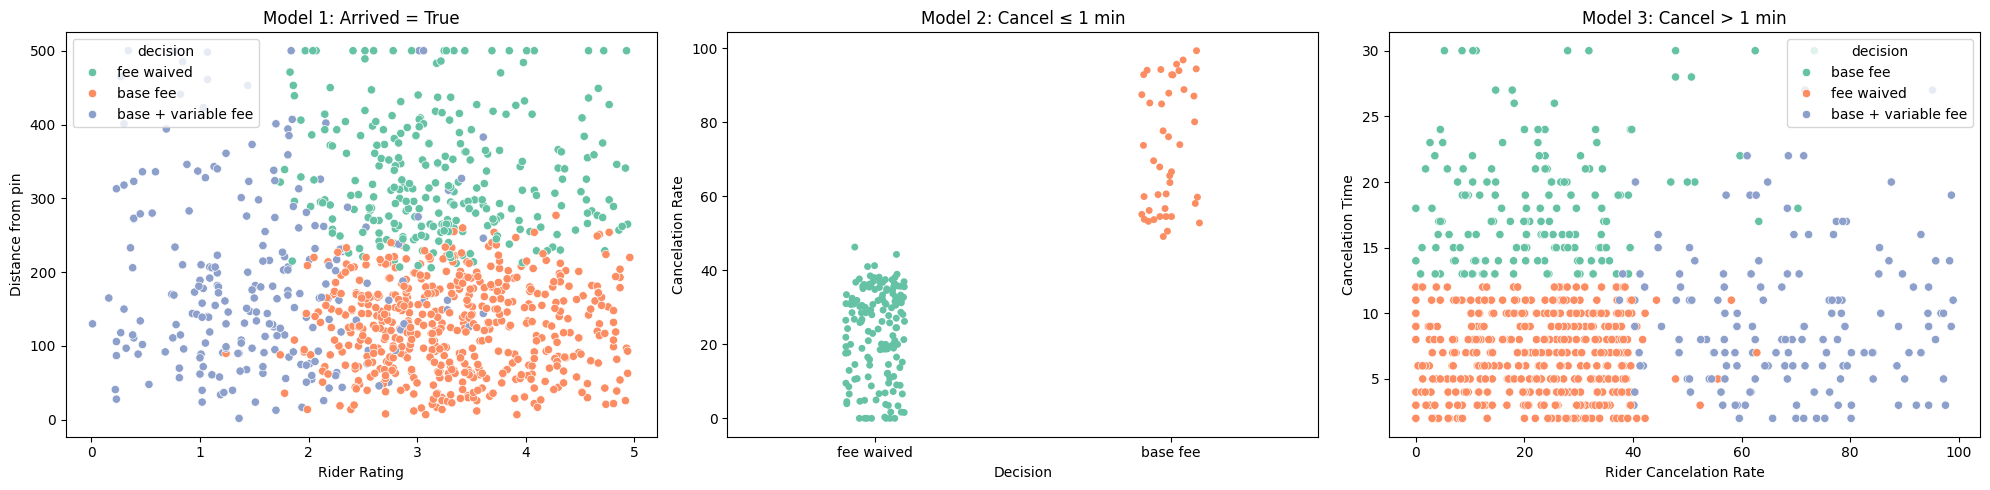

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/rider_cancellations.csv')

# -------------------------
# Model 1: Arrived == True
# -------------------------
df_m1 = df[df['arrived'] == True].copy()
X1 = df_m1[['rider_rating', 'wait_time', 'rider_cancelation_rate', 'distance_from_pin']]

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
df_m1['cluster'] = pipeline1.fit_predict(X1)

# Mapping decisions for Model 1
decision_map_1 = {
    0: 'base fee',
    1: 'fee waived',
    2: 'base + variable fee'
}
df_m1['decision'] = df_m1['cluster'].map(decision_map_1)

# -------------------------
# Model 2: Arrived == False and cancelation_time <= 1
# -------------------------
df_m2 = df[(df['arrived'] == False) & (df['cancelation_time'] <= 1)].copy()
X2 = df_m2[['rider_cancelation_rate']]

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])
df_m2['cluster'] = pipeline2.fit_predict(X2)

# Mapping decisions for Model 2
decision_map_2 = {
    0: 'base fee',
    1: 'fee waived'
}
df_m2['decision'] = df_m2['cluster'].map(decision_map_2)

# -------------------------
# Model 3: Arrived == False and cancelation_time > 1
# -------------------------
df_m3 = df[(df['arrived'] == False) & (df['cancelation_time'] > 1)].copy()
X3 = df_m3[['rider_rating', 'cancelation_time', 'rider_cancelation_rate']]

pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
df_m3['cluster'] = pipeline3.fit_predict(X3)

# Mapping decisions for Model 3
decision_map_3 = {
    0: 'base + variable fee',
    1: 'fee waived',
    2: 'base fee'
}
df_m3['decision'] = df_m3['cluster'].map(decision_map_3)

# -------------------------
# Visualization (Optional)
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(data=df_m1, x='rider_rating', y='distance_from_pin', hue='decision', palette='Set2', ax=axes[0])
axes[0].set_title('Model 1: Arrived = True')
axes[0].set_xlabel('Rider Rating')
axes[0].set_ylabel('Distance from pin')

sns.stripplot(data=df_m2, x='decision', y='rider_cancelation_rate', palette='Set2', ax=axes[1])
axes[1].set_title('Model 2: Cancel ≤ 1 min')
axes[1].set_xlabel('Decision')
axes[1].set_ylabel('Cancelation Rate')

sns.scatterplot(data=df_m3, x='rider_cancelation_rate', y='cancelation_time', hue='decision', palette='Set2', ax=axes[2])
axes[2].set_title('Model 3: Cancel > 1 min')
axes[2].set_xlabel('Rider Cancelation Rate')
axes[2].set_ylabel('Cancelation Time')

plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Load dataset
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/rider_cancellations.csv')

# -------------------------
# Model 1: Arrived == True
# -------------------------
df_m1 = df[df['arrived'] == True].copy()
X1 = df_m1[['rider_rating', 'wait_time', 'rider_cancelation_rate', 'distance_from_pin']]
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
pipeline1.fit(X1)
joblib.dump(pipeline1, 'rider_cancels_model1.pkl')

# -------------------------
# Model 2: Arrived == False and cancelation_time <= 1
# -------------------------
df_m2 = df[(df['arrived'] == False) & (df['cancelation_time'] <= 1)].copy()
X2 = df_m2[['rider_cancelation_rate']]
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])
pipeline2.fit(X2)
joblib.dump(pipeline2, 'rider_cancels_model2.pkl')

# -------------------------
# Model 3: Arrived == False and cancelation_time > 1
# -------------------------
df_m3 = df[(df['arrived'] == False) & (df['cancelation_time'] > 1)].copy()
X3 = df_m3[['rider_rating', 'cancelation_time', 'rider_cancelation_rate']]
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
pipeline3.fit(X3)
joblib.dump(pipeline3, 'rider_cancels_model3.pkl')

['rider_cancels_model3.pkl']